In [1]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B0028C44Z0,A3U94LRA4I8YAL,"Brenda Woodward ""love to read""",2,3,5,1265932800,Tasty!!,These mints are really strong and have a great...
1,2,B0028C44Z0,A1WTXY4MW3YDF2,Gordon,0,0,5,1344729600,These mints are awesome!,This is a huge supply of them. I'm still worki...
2,3,B0028C44Z0,A1UF2VN3O50NGW,Lou,0,0,2,1330819200,Altoids Smalls,"Even with small containers, they don't fill th..."
3,4,B0028C44Z0,A3VAYCK681VZZO,Optimus,0,0,5,1320710400,Love these! And reusable containers,"I love, and use the empty containers for medic..."
4,5,B0028C44Z0,A3TIC20I6XI297,dog lover,0,0,5,1320451200,Altoids,Received as shown. My mother in law likes thes...


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

[nltk_data] Downloading package stopwords to C:\Users\Therese
[nltk_data]     Ann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


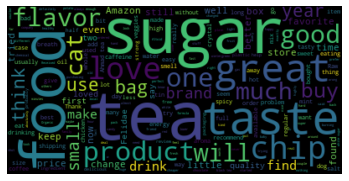

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('picturetxt.png')
plt.show()

In [4]:
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B0028C44Z0,A3U94LRA4I8YAL,"Brenda Woodward ""love to read""",2,3,5,1265932800,Tasty!!,These mints are really strong and have a great...,1
1,2,B0028C44Z0,A1WTXY4MW3YDF2,Gordon,0,0,5,1344729600,These mints are awesome!,This is a huge supply of them. I'm still worki...,1
2,3,B0028C44Z0,A1UF2VN3O50NGW,Lou,0,0,2,1330819200,Altoids Smalls,"Even with small containers, they don't fill th...",-1
3,4,B0028C44Z0,A3VAYCK681VZZO,Optimus,0,0,5,1320710400,Love these! And reusable containers,"I love, and use the empty containers for medic...",1
4,5,B0028C44Z0,A3TIC20I6XI297,dog lover,0,0,5,1320451200,Altoids,Received as shown. My mother in law likes thes...,1


In [5]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

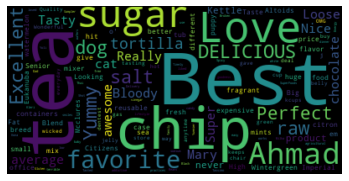

In [6]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
pos = ",".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

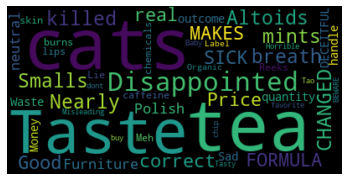

In [7]:
stopwords = set(STOPWORDS)
neg = ','.join([str(review) for review in negative.Summary])
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudneg.png')
plt.show()

In [8]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [9]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [10]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Tasty,1
1,These mints are awesome,1
2,Altoids Smalls,-1
3,Love these And reusable containers,1
4,Altoids,1


In [11]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [14]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [15]:
lr.fit(X_train,y_train)

LogisticRegression()

In [16]:
predictions = lr.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 0,  0],
       [ 5, 18]], dtype=int64)

In [18]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.78      0.88        23

    accuracy                           0.78        23
   macro avg       0.50      0.39      0.44        23
weighted avg       1.00      0.78      0.88        23



C:\Users\Buenaventura\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Buenaventura\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Buenaventura\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

